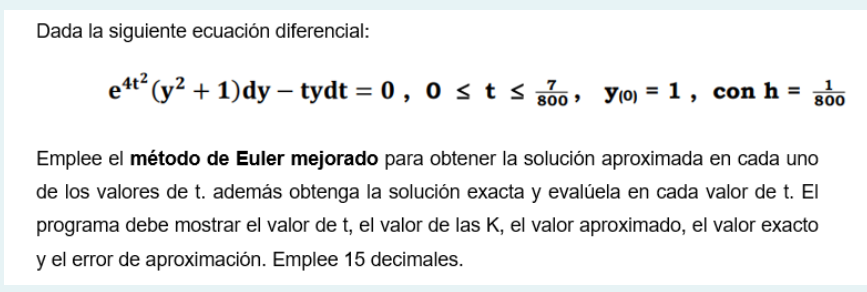

Despejo la función

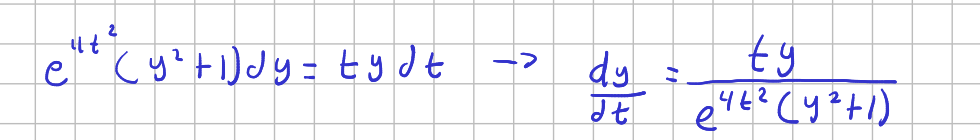

Soluciono en Python

In [3]:
from sympy import *
from numpy import arange

fy = symbols("fy", cls=Function)
t, y = symbols("t y")

h = 1/800

eq = Eq(fy(t).diff(), (t*fy(t)) / (exp(4*t**2) * ((fy(t))**2 + 1)))
f = (t*y) / (exp(4*t**2) * (y**2 + 1))


# Hago mi intervalo
T = [t for t in arange(0, 7/800 + h/2, h)]
T

[0.0, 0.00125, 0.0025, 0.00375, 0.005, 0.00625, 0.0075, 0.00875]

In [4]:
# Declaro la lista con y_0 = 0

Y = [1]
K1 = [0]
K2 = [0]

# Hago un for para aplicar la fórmula
for i in range(1, len(T)):
    k1 = f.subs({t: T[i-1], y: Y[i-1]})
    k2 = f.subs({t: T[i-1] + h, y: Y[i-1] + h*k1})
    K1.append(k1)
    K2.append(k2)
    Y.append(Y[i-1] + (h/2)*(k1 + k2))
Y

[1,
 1.00000039062256,
 1.00000156247559,
 1.00000351551514,
 1.00000624966798,
 1.00000976483159,
 1.00001406087415,
 1.00001913763459]

In [6]:
# como no fue posible resolver la EDI de forma simbólica, lo hacemos de forma 
# númerica con scipy
from scipy.integrate import solve_ivp


def funcionEq(t, y): 
    return (t*y) / (exp(4*t**2) * (y**2 + 1))

solucion = solve_ivp(funcionEq, (0, 7/800), [1], t_eval=T)
solucion_exacta = []
for i in solucion.y[0]:
    solucion_exacta.append(float(i))
solucion_exacta

[1.0,
 1.0000003906237795,
 1.0000015624804726,
 1.0000035155261293,
 1.0000062496875106,
 1.000009764862096,
 1.0000140609180836,
 1.0000191376943899]

In [7]:
# pasamos todos los datos a una lista anidada para poder desplegarlos en una tabla

from utils import imprimir_tabla

lista_tabla = [["ti", "k1", "k2", "Yi", "F(ti)", "Error"]]

for i in range(len(T)):
    lista_tabla.append(
        [
            str(T[i]),
            str(K1[i]),
            str(K2[i]),
            str(Y[i]),
            str(solucion_exacta[i]),
            str(abs(Y[i] - solucion_exacta[i])),
        ]
    )

imprimir_tabla(lista_tabla)

┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ ti      ┃ k1                 ┃ k2                 ┃ Yi               ┃ F(ti)              ┃ Error               ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ 0.0     │ 0                  │ 0                  │ 1                │ 1.0                │ 0.0                 │
│ 0.00125 │ 0                  │ 0.0006249960937622 │ 1.00000039062256 │ 1.0000003906237795 │ 1.22102328248275e-1 │
│         │                    │ 07                 │                  │                    │ 2                   │
│ 0.0025  │ 0.0006249960937621 │ 0.0012499687503897 │ 1.00000156247559 │ 1.0000015624804726 │ 4.88653562058516e-1 │
│         │ 59                 │ 6                  │                  │                    │ 2                   │
│ 0.00375 │ 0.0012499687503891 │ 0.0018748945342071 │ 1.00000351551514 │ 1.0000035155261293 │ 1.09903197653693e-1 │
│         │ 0                  │ 0                  │                  │                    │ 1                   │
│ 0.005   │ 0.0018748945342046 │ 0.0024997500124566 │ 1.00000624966798 │ 1.0000062496875106 │ 1.95299332261811e-1 │
│         │ 7                  │ 8                  │                  │                    │ 1                   │
│ 0.00625 │ 0.0024997500124507 │ 0.0031245117567577 │ 1.00000976483159 │ 1.000009764862096  │ 3.05095948505141e-1 │
│         │ 7                  │ 0                  │                  │                    │ 1                   │
│ 0.0075  │ 0.0031245117567460 │ 0.0037491563445644 │ 1.00001406087415 │ 1.0000140609180836 │ 4.39339675750716e-1 │
│         │ 2                  │ 4                  │                  │                    │ 1                   │
│ 0.00875 │ 0.0037491563445441 │ 0.0043736603606240 │ 1.00001913763459 │ 1.0000191376943899 │ 5.97994986861750e-1 │
│         │ 4                  │ 6                  │                  │                    │ 1                   │
└─────────┴────────────────────┴────────────────────┴──────────────────┴────────────────────┴─────────────────────┘